# Zomato Data Analysis Using Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/Zomato-data-.csv")
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [3]:
def handleRate(value):
  value = (value).split("/")
  value = value[0]

  return float(value)
df['rate'] = df['rate'].apply(handleRate)

In [4]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


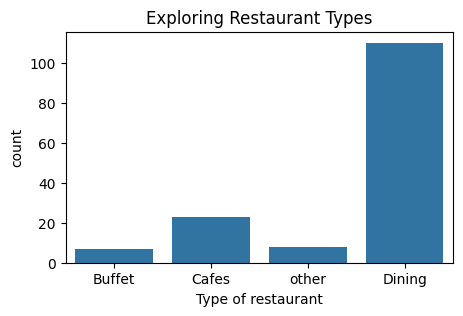

In [6]:

plt.figure(figsize=(5,3))
sns.countplot(x=df["listed_in(type)"])
plt.title("Exploring Restaurant Types")
plt.xlabel("Type of restaurant")
plt.show()

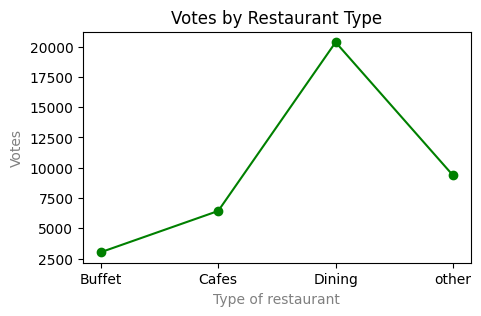

In [7]:
gp_df = df.groupby('listed_in(type)')['votes'].sum()

result = pd.DataFrame({'votes': gp_df})

plt.figure(figsize=(5,3))

plt.plot(result, c='green', marker='o')
plt.title("Votes by Restaurant Type")
plt.xlabel('Type of restaurant', c='grey')
plt.ylabel('Votes', c='grey',)

plt.show()

In [8]:
max_votes = df['votes'].max()
restaurant_with_max_votes = df.loc[df['votes'] == max_votes, 'name']

print('Restaurant(s) with the maximum votes:')
print(restaurant_with_max_votes)

Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


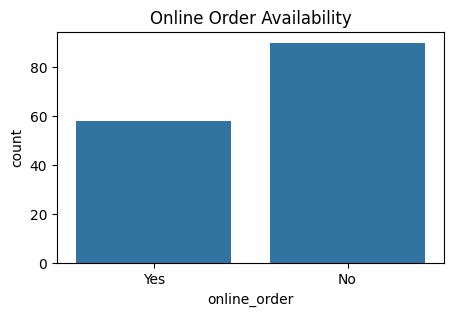

In [9]:
plt.figure(figsize=(5,3))

sns.countplot(x=df['online_order'])

plt.title("Online Order Availability")
plt.show()

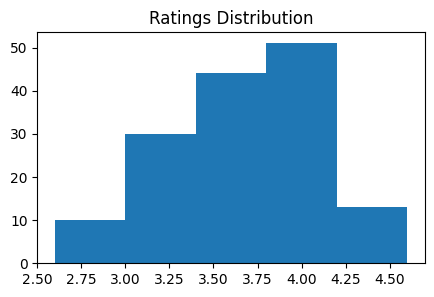

In [10]:
plt.figure(figsize=(5,3))
plt.hist(df['rate'],bins=5)
plt.title('Ratings Distribution')
plt.show()

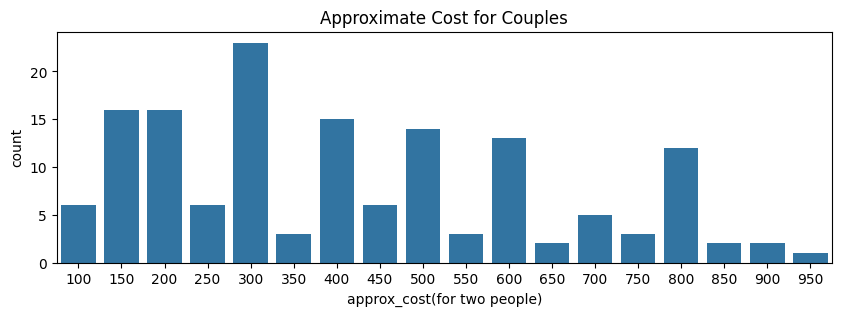

In [11]:
plt.figure(figsize=(10,3))

couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)

plt.title('Approximate Cost for Couples')
plt.show()

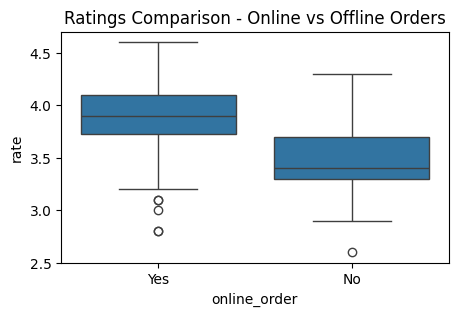

In [12]:
plt.figure(figsize=(5,3))

sns.boxplot(x="online_order", y="rate", data=df)

plt.title('Ratings Comparison - Online vs Offline Orders')
plt.show()

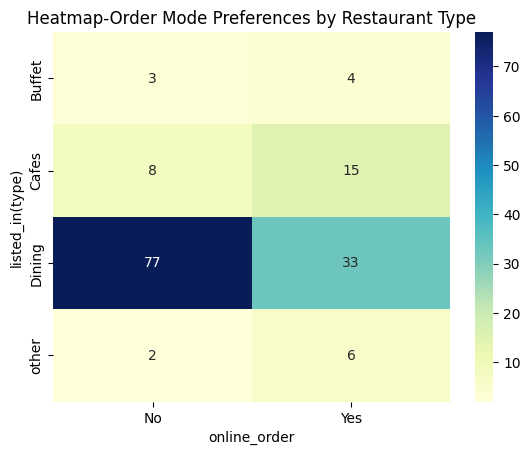

In [14]:
pivot_table = df.pivot_table(
    index="listed_in(type)",
    columns="online_order",
    aggfunc ="size",
    fill_value=0
    )

sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt="d")

plt.title('Heatmap-Order Mode Preferences by Restaurant Type')
plt.show()